## Age/Net Worth Regression in sklearn

Text(0, 0.5, 'net worths')

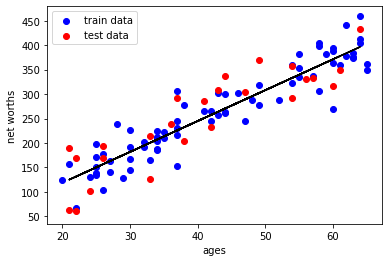

In [8]:
import sys
sys.path.append("/home/cit5/Downloads/ud120-projects-master/tools/")
sys.path.append('/home/cit5/Downloads/ud120-projects-master/choose_your_own')
sys.path.append('/home/cit5/Downloads/ud120-projects-master/datasets_questions')

import os
os.chdir('/home/cit5/Downloads/ud120-projects-master/regression')


import numpy
import matplotlib
matplotlib.use('agg')

import matplotlib.pyplot as plt
from class_vis import prettyPicture, output_image

from ages_net_worth import ageNetWorthData

ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()


from sklearn import linear_model

def studentReg(ages_train, net_worths_train):
    reg = linear_model.LinearRegression()
    reg.fit(ages_train, net_worths_train)
    return reg


reg = studentReg(ages_train, net_worths_train)

%matplotlib inline
plt.clf()
plt.scatter(ages_train, net_worths_train, color="b", label="train data")
plt.scatter(ages_test, net_worths_test, color="r", label="test data")
plt.plot(ages_test, reg.predict(ages_test), color="black")
plt.legend(loc=2)
plt.xlabel("ages")
plt.ylabel("net worths")

## Now You Practice Extracting Information

In [9]:
reg = linear_model.LinearRegression()
reg.fit(ages_train, net_worths_train)

### get Katie's net worth (she's 27)
### sklearn predictions are returned in an array, so you'll want to index into
### the output to get what you want, e.g. net_worth = predict([[27]])[0][0] (not
### exact syntax, the point is the [0] at the end). In addition, make sure the
### argument to your prediction function is in the expected format - if you get
### a warning about needing a 2d array for your data, a list of lists will be
### interpreted by sklearn as such (e.g. [[27]]).
km_net_worth = reg.predict([[27]])[0][0]

### get the slope
### again, you'll get a 2-D array, so stick the [0][0] at the end
slope = reg.coef_[0][0]

### get the intercept
### here you get a 1-D array, so stick [0] on the end to access
### the info we want
intercept = reg.intercept_[0]


### get the score on test data
test_score = reg.score(ages_test, net_worths_test)


### get the score on the training data
training_score = reg.score(ages_train, net_worths_train)

## Bonus Target and Features

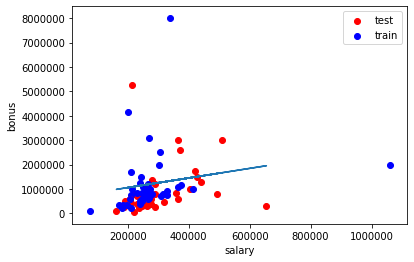

In [12]:
import pickle
from feature_format import featureFormat, targetFeatureSplit

dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "rb") )

def finance_regression(dictionary, features_list, fit_test=False):
    data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
    target, features = targetFeatureSplit( data )

    ### training-testing split needed in regression, just like classification
    from sklearn.model_selection import train_test_split
    feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
    train_color = "b"
    test_color = "r"


    reg = linear_model.LinearRegression()
    reg.fit(feature_train, target_train)


    ### draw the scatterplot, with color-coded training and testing points
    import matplotlib.pyplot as plt
    for feature, target in zip(feature_test, target_test):
        plt.scatter( feature, target, color=test_color ) 
    for feature, target in zip(feature_train, target_train):
        plt.scatter( feature, target, color=train_color ) 

    ### labels for the legend
    plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
    plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")


    # draw the regression line, once it's coded
    plt.plot( feature_test, reg.predict(feature_test) )
    plt.xlabel(features_list[1])
    plt.ylabel(features_list[0])
    plt.legend()
    
    if fit_test:
        reg.fit(feature_test, target_test)
        plt.plot(feature_train, reg.predict(feature_train), color="r") 
    
    return (reg, feature_train, target_train, feature_test, target_test)


(reg, feature_train, target_train, feature_test, target_test) = finance_regression(dictionary, ["bonus", "salary"])

## Extracting Slope and Intercept

In [13]:
print ('slope = {0}'.format(reg.coef_[0]))
print ('intercept = {0}'.format(reg.intercept_))

slope = 1.9701728684684932
intercept = 662220.4176015807


## Regression Score: Training Data

In [14]:
print ('score on training set = {0}'.format(reg.score(feature_train, target_train)))

score on training set = 0.04164573226747781


## Regression Score: Test Data

In [15]:
print ('score on test set = {0}'.format(reg.score(feature_test, target_test)))

score on test set = -0.04471207836147806


## Regressing Bonus Against LTI

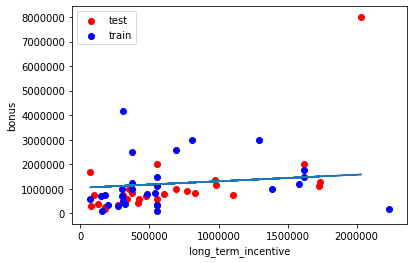

In [16]:
(reg, feature_train, target_train, feature_test, target_test) = finance_regression(dictionary, ['bonus', 'long_term_incentive'])

In [17]:
print ('score on test set = {0}'.format(reg.score(feature_test, target_test)))

score on test set = 0.10891175736247383


## Sneak Peek: Outliers Break Regressions

slope = 2.367612124817566


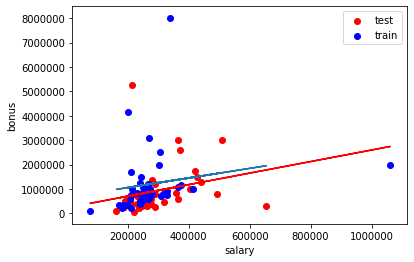

In [18]:
(reg, feature_train, target_train, feature_test, target_test) = finance_regression(dictionary, ["bonus", "salary"], fit_test=True)
print ('slope = {0}'.format(reg.coef_[0]))